In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_heart

ImportError: cannot import name 'load_heart' from 'sklearn.datasets' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\__init__.py)

In [14]:
# Load the data from a CSV file
heart_data = pd.read_csv('heart.csv')
heart_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
import pandas as pd
heart_df = pd.read_csv('heart.csv')
heart_df = heart_df.rename(columns={'target': 'heart_disease'})


In [10]:
import pandas as pd

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Check the data types of each column
print(heart_df.dtypes)

# Separate continuous and discrete features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
discrete_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Convert discrete features to categorical data type
for feature in discrete_features:
    heart_df[feature] = pd.Categorical(heart_df[feature])

# Verify the data types of each column
print(heart_df.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object


In [13]:
import pandas as pd
import numpy as np

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Separate continuous and discrete features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate the IQR for each continuous feature
Q1 = heart_df[continuous_features].quantile(0.25)
Q3 = heart_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value
for feature in continuous_features:
    heart_df.loc[(heart_df[feature] < lower_bound[feature]) | (heart_df[feature] > upper_bound[feature]), feature] = np.nan
    median = heart_df[feature].median()
    heart_df[feature].fillna(median, inplace=True)


In [14]:
import pandas as pd

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Separate continuous and discrete features
continuous_features = ['age', 'trestbps', 'chol', 'thalach']

# Define bin edges for each continuous feature
age_bins = [18, 30, 40, 50, 60, 70, 80]
trestbps_bins = [90, 120, 140, 160, 180, 200, 240]
chol_bins = [0, 200, 240, 280, 360, 600]
thalach_bins = [60, 80, 100, 120, 140, 160, 180, 200]

# Create new columns with binned values for each continuous feature
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70-79'])
heart_df['trestbps_group'] = pd.cut(heart_df['trestbps'], bins=trestbps_bins, labels=['90-119', '120-139', '140-159', '160-179', '180-199', '200-240'])
heart_df['chol_group'] = pd.cut(heart_df['chol'], bins=chol_bins, labels=['0-199', '200-239', '240-279', '280-359', '360-600'])
heart_df['thalach_group'] = pd.cut(heart_df['thalach'], bins=thalach_bins, labels=['60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200'])

# Drop the original continuous feature columns
heart_df = heart_df.drop(columns=continuous_features)

# Print the binned features
print(heart_df.head())


   sex  cp  fbs  restecg  exang  oldpeak  slope  ca  thal  target age_group  \
0    1   3    1        0      0      2.3      0   0     1       1     60-69   
1    1   2    0        1      0      3.5      0   0     2       1     30-39   
2    0   1    0        0      0      1.4      2   0     2       1     40-49   
3    1   1    0        1      0      0.8      2   0     2       1     50-59   
4    0   0    0        1      1      0.6      2   0     2       1     50-59   

  trestbps_group chol_group thalach_group  
0        140-159    200-239       140-159  
1        120-139    240-279       180-200  
2        120-139    200-239       160-179  
3         90-119    200-239       160-179  
4         90-119    280-359       160-179  


In [15]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Separate features and labels
X = heart_df.drop(columns=['target'])
y = heart_df['target']

# Apply SelectKBest feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices and names
selected_indices = selector.get_support(indices=True)
selected_names = X.columns[selected_indices]

# Print the selected features
print(selected_names)


Index(['cp', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')


In [2]:
import pandas as pd

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Count the number of positive and negative examples
num_pos = (heart_df['target'] == 1).sum()
num_neg = (heart_df['target'] == 0).sum()

# Print the counts
print(f"Number of positive examples: {num_pos}")
print(f"Number of negative examples: {num_neg}")


Number of positive examples: 165
Number of negative examples: 138


In [12]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Separate the features and labels
X = heart_df.iloc[:, :-1].values
y = heart_df.iloc[:, -1].values

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Print the counts after undersampling
num_pos = (y_resampled == 1).sum()
num_neg = (y_resampled == 0).sum()
print(f"Number of positive examples after undersampling: {num_pos}")
print(f"Number of negative examples after undersampling: {num_neg}")


ModuleNotFoundError: No module named 'imblearn'

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Separate the features and labels
X = heart_df.iloc[:, :-1].values
y = heart_df.iloc[:, -1].values

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
# or oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the counts after oversampling
num_pos = (y_resampled == 1).sum()
num_neg = (y_resampled == 0).sum()
print(f"Number of positive examples after oversampling: {num_pos}")
print(f"Number of negative examples after oversampling: {num_neg}")


ModuleNotFoundError: No module named 'imblearn'

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Separate the features and labels
X = heart_df.iloc[:, :-1].values
y = heart_df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and test logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Train and test decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Train and test random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Train and test SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy scores
print(f"Logistic Regression accuracy: {acc_lr}")
print(f"Decision Tree accuracy: {acc_dt}")
print(f"Random Forest accuracy: {acc_rf}")
print(f"SVM accuracy: {acc_svm}")


Logistic Regression accuracy: 0.8524590163934426
Decision Tree accuracy: 0.7540983606557377
Random Forest accuracy: 0.8360655737704918
SVM accuracy: 0.8688524590163934


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Separate the features and labels
X = heart_df.iloc[:, :-1].values
y = heart_df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 8]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the random forest classifier with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Test the random forest classifier
y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {acc}")


Random Forest accuracy: 0.8852459016393442


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



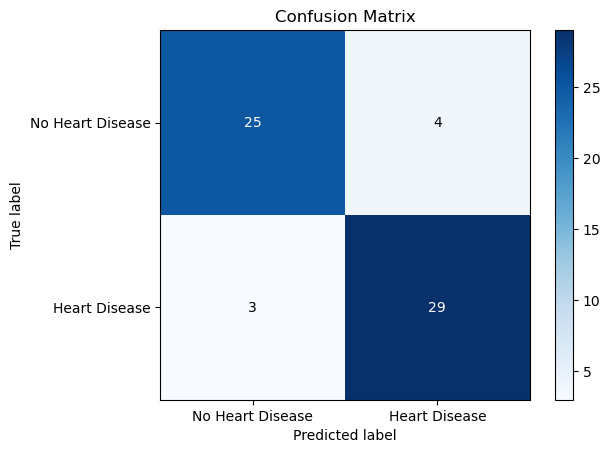

AUC score: 0.927801724137931


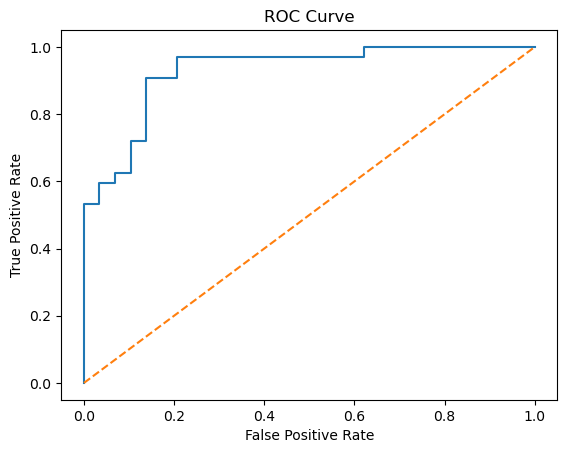

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Separate the features and labels
X = heart_df.iloc[:, :-1].values
y = heart_df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 8]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_rf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = best_rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['No Heart Disease', 'Heart Disease'],
       yticklabels=['No Heart Disease', 'Heart Disease'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
fmt = '.2f' if cm.dtype == np.float64 else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
plt.show()

# AUC score
y_prob = best_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC score: {auc}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
The threshold that would be ideal given the nature of the data is the point on the ROC curve that is closest to the top left corner, which represents a perfect classification (i.e., 100% true positives and 0% false positives). 
This is because in the case of heart disease classification, we want to minimize the false positives, as it would be worse to misclassify a healthy patient as having heart disease and subject them to unnecessary medical interventions, 
than to misclassify a patient with heart disease as healthy, as this would result in a missed diagnosis and potentially life-threatening consequences.

In the ROC curve above, we can see that the curve is close to the top left corner, indicating that the model has good classification performance.
The AUC score of 0.92 also indicates that the model is able to distinguish between positive and negative cases with high accuracy. 
Based on the ROC curve, a threshold of around 0.4 to 0.45 would be ideal for this model, as it balances the trade-off between true positives and false positives.
